本课程参考 Harvard Stat 115/215 Lab1 R Basics 相关内容，作为快速上手Bioinformatics的前置知识，内容简短。

本内容也可直接看对应的ipynb记事本文件。

## 1 安装相关R包

我们在之前的文章中已经从Anaconda创建了R语言环境，且安装了相应的包，并可以用Jupyter Notebook环境写R了。

本节需要用到3个R包：`ggplot2`、`dplyr`、`nycflights13`。

其中ggplot2和dplyr已经包含在r-essentials中了，我们只需要安装nycflights13即可。

```bash
conda activate 环境名
conda install -c conda-forge r-nycflights13
```

注：nycflights13包提供了一个经典的数据集集合，专门用于学习和教学数据分析。它记录了 2013 年美国纽约三大机场（JFK、LGA、EWR）所有航班的数据。可与 dplyr 和 ggplot2 一起用于教学数据清洗和探索性数据分析。

---

## 2 R中的数据类型和数据结构

首先了解R的基本数据类型和数据结构。

R有6种基本数据类型：

- 字符型（character）`"A"`
- 数值型（numeric）`1`
- 整型（integer）`1L`
- 逻辑型（logical）`TRUE, T`
- 复数型（complex）`1+1i`

R有多种数据结构，包括：

- 原子向量（atomic vector）
- 列表（list）
- 矩阵（matrix）
- 数据框（data frame）
- 因子（factors）

> 注：
> 
> ①关于**atomic**（原子性）<br>
> 意为向量或集合中所有元素都是同一种数据类型。
> 
> ②关于**因子**（Factors）数据结构<br>
> **因子**（factors）是R中的一种特殊数据结构，主要用于表示**分类数据**（categorical data）。因子将数据的不同类别存储为**离散的水平（levels）**，并使用整数值来表示这些水平，从而优化内存使用并提高处理效率。

## 3 R向量（Vectors）

R天生支持向量化操作（这与Python中的列表不同）。

In [1]:
# 创建一个向量
# 注意R中对象赋值的符号为：<-
x <- c(1, 2, 3, 4, 5) 
print(x[2]) # 按索引访问元素（索引从1开始）

# 对向量中的每个元素进行操作
x^2
sqrt(x)

# 向量也可以是逻辑型
print(x[x < 3]) # 使用逻辑向量进行索引

# 初始化一个空向量
vector("numeric", 5)

[1] 2


[1]  1  4  9 16 25

[1] 1.000000 1.414214 1.732051 2.000000 2.236068

[1] 1 2


[1] 0 0 0 0 0

## 4 R矩阵（Matrices）

矩阵是带有维度属性的R向量，它也是原子性的（atomic）。

In [2]:
# 创建一个2x4矩阵
y <- matrix(1:8, nrow = 2, ncol = 4, byrow = FALSE) 
y # 查看矩阵
str(y) # 查看矩阵的结构

# 访问矩阵元素
y[1, 2] # 访问第一行第二列的元素
y[, 2]  # 访问第二列的所有元素
dim(y) # 获取矩阵的维度(size of y)
y %*% t(y) # 矩阵乘法

1,3,5,7
2,4,6,8


 int [1:2, 1:4] 1 2 3 4 5 6 7 8


[1] 3

[1] 3 4

[1] 2 4

84,100
100,120


In [3]:
dim(y) <- NULL  # 将y的维度信息清除，矩阵就变成了展平的一维vector
y

[1] 1 2 3 4 5 6 7 8

## 5 R列表（List）

列表是可包含不同类型对象的通用向量。

In [4]:
# 创建一个包含向量、矩阵和列表的列表
list_data <- list(c("Jan", "Feb", "Mar"), 
                  matrix(c(3, 9, 5, 1, -2, 8), nrow = 2),
                  list("green", 12.3))

# 为列表中的元素命名
names(list_data) <- c("1st Quarter", "A_Matrix", "A Inner list")

# 显示列表的结构
str(list_data)

# 显示列表
list_data

List of 3
 $ 1st Quarter : chr [1:3] "Jan" "Feb" "Mar"
 $ A_Matrix    : num [1:2, 1:3] 3 9 5 1 -2 8
 $ A Inner list:List of 2
  ..$ : chr "green"
  ..$ : num 12.3


3,5,-2
9,1,8


## 6 R数据框（Data Frames）

数据框是含有多个相同**长度**的R向量的列表。

In [5]:
data(mtcars) # 加载一个著名的数据集，来自nycflights13
str(mtcars) # 查看数据框的结构，它是数值向量的列表
head(mtcars) # 显示前六行

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [6]:
mtcars[1, 1] # 访问第一行第一列的值
head(mtcars[1]) # 返回数据框中第一列（仍是数据框形式）
head(mtcars[[1]]) # 返回数据框中第一列的向量形式
sapply(mtcars, sum) # 对数据框的每列计算总和

[1] 21

,mpg
,<dbl>
Mazda RX4,21.0
Mazda RX4 Wag,21.0
Datsun 710,22.8
Hornet 4 Drive,21.4
Hornet Sportabout,18.7
Valiant,18.1


[1] 21.0 21.0 22.8 21.4 18.7 18.1

mpg      cyl     disp       hp     drat       wt     qsec       vs 
 642.900  198.000 7383.100 4694.000  115.090  102.952  571.160   14.000 
      am     gear     carb 
  13.000  118.000   90.000

## 7 使用`dplyr`进行数据操作

- **`dplyr`** 是一个R包，它常被视为R中一种数据处理的“语言”，可以非常简单直观地操作数据。
- 数据科学（以及计算生物学）的工作中，80%是数据清理，20%是数据分析。
- `dplyr` 的官方文档：[https://cran.r-project.org/web/packages/dplyr/vignettes/dplyr.html](https://cran.r-project.org/web/packages/dplyr/vignettes/dplyr.html)


In [7]:
library(dplyr)
library(nycflights13)

data(flights) # 载入数据集
head(flights)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


### 7.1 filter (按条件筛选)

- 根据条件选择特定的行。

In [8]:
# 设置HTML表格显示行数
options(repr.matrix.max.rows = 14) # 设置显示的最大行数
options(repr.matrix.max.cols = 8)  # 设置显示的最大列数（可选）

filter(flights, month == 1, day == 1)

year,month,day,dep_time,⋯,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,⋯,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,⋯,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,⋯,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,⋯,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,⋯,762,6,0,2013-01-01 06:00:00
2013,1,1,554,⋯,719,5,58,2013-01-01 05:00:00
2013,1,1,555,⋯,1065,6,0,2013-01-01 06:00:00
⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮
2013,1,1,2353,⋯,1617,23,59,2013-01-01 23:00:00


### 7.2 select (选择特定列)
- 选择特定的列。

In [9]:
select(flights, year, month, day)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
⋮,⋮,⋮
2013,9,30


### 7.3 mutate (添加新列)
- 添加新列（可从已有列的数据中创建）。

In [10]:
mutate(flights,
  gain = arr_delay - dep_delay,
  speed = distance / air_time * 60
)

year,month,day,dep_time,⋯,minute,time_hour,gain,speed
<int>,<int>,<int>,<int>,⋯,<dbl>,<dttm>,<dbl>,<dbl>
2013,1,1,517,⋯,15,2013-01-01 05:00:00,9,370.0441
2013,1,1,533,⋯,29,2013-01-01 05:00:00,16,374.2731
2013,1,1,542,⋯,40,2013-01-01 05:00:00,31,408.3750
2013,1,1,544,⋯,45,2013-01-01 05:00:00,-17,516.7213
2013,1,1,554,⋯,0,2013-01-01 06:00:00,-19,394.1379
2013,1,1,554,⋯,58,2013-01-01 05:00:00,16,287.6000
2013,1,1,555,⋯,0,2013-01-01 06:00:00,24,404.4304
⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮
2013,9,30,2349,⋯,59,2013-09-30 23:00:00,-15,495


### 7.4 arrange (排序)
- 根据列对数据框进行排序。

In [11]:
arrange(flights, year, month, day)

year,month,day,dep_time,⋯,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,⋯,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,⋯,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,⋯,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,⋯,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,⋯,762,6,0,2013-01-01 06:00:00
2013,1,1,554,⋯,719,5,58,2013-01-01 05:00:00
2013,1,1,555,⋯,1065,6,0,2013-01-01 06:00:00
⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮
2013,12,31,NA,⋯,2454,14,30,2013-12-31 14:00:00


**desc (降序排序)**

- 使用 desc 按降序排序。

In [12]:
select(arrange(flights, desc(dep_delay)), year, month, day, dep_delay)

year,month,day,dep_delay
<int>,<int>,<int>,<dbl>
2013,1,9,1301
2013,6,15,1137
2013,1,10,1126
2013,9,20,1014
2013,7,22,1005
2013,4,10,960
2013,3,17,911
⋮,⋮,⋮,⋮
2013,9,29,NA


### 7.5 summarize (聚合)
- 将多个数字聚合为一个数字。

In [13]:
summarise(flights,
  delay = mean(dep_delay, na.rm = TRUE) # 设定为移除缺失值后再进行计算
)

delay
<dbl>
12.63907


### 7.6 group_by (分组)
- `dplyr` 的强大之处在于其支持的 `分组-应用-聚合` 工作流。
- 例如，按飞机编号(tailnum)分组，计算航班数量、平均距离和平均延误。

In [ ]:
by_tailnum <- group_by(flights, tailnum)
delay <- summarise(by_tailnum,
   count = n(),  # 计算数量
   dist = mean(distance, na.rm = TRUE),
   arr_delay = mean(arr_delay, na.rm = TRUE))
delay <- filter(delay, count > 20, dist < 2000)
delay

tailnum,count,dist,arr_delay
<chr>,<int>,<dbl>,<dbl>
N0EGMQ,371,676.1887,9.9829545
N10156,153,757.9477,12.7172414
N102UW,48,535.8750,2.9375000
N103US,46,535.1957,-6.9347826
N104UW,47,535.2553,1.8043478
N10575,289,519.7024,20.6914498
N105UW,45,524.8444,-0.2666667
⋮,⋮,⋮,⋮
N997AT,44,679.0455,16.302326


## 8 关于数据处理的工作流

我们如何一次对数据进行以上多个步骤的处理？请看以下示例：

>```R
>a1 <- group_by(flights, year, month, day)
>a2 <- select(a1, arr_delay, dep_delay)
>a3 <- summarise(a2,
>  arr = mean(arr_delay, na.rm = TRUE),
>  dep = mean(dep_delay, na.rm = TRUE))
>a4 <- filter(a3, arr > 30 | dep > 30)
>```

注意，上面创建了一些变量（如 `a1`），它们仅用于下一步操作后就再也没有被使用。这通常不是一个好的编程习惯，因为浪费了变量。

---

再看这个:

>```R
>filter(
>  summarise(
>    select(
>      group_by(flights, year, month, day),
>      arr_delay, dep_delay
>    ),
>    arr = mean(arr_delay, na.rm = TRUE),
>    dep = mean(dep_delay, na.rm = TRUE)
>  ),
>  arr > 30 | dep > 30
>)
>```

这段代码特别难读！

下面介绍R中最常用的Pipe Operator，它可作为一种标准的数据处理工作流。

---

## 9 The Pipe Operator `%>%` (管道操作符)

如果按“从内到外”嵌套的方式书写代码，代码可能很难读。
为了解决这个问题，可以使用 `%>%` 操作符（Pipe Operator），它可以将 `f(x, y)` 转换为 `x %>% f(y)`的形式。这样代码更容易阅读。

>```R
>flights %>%
>  group_by(year, month, day) %>%
>  select(arr_delay, dep_delay) %>%
>  summarise(
>    arr = mean(arr_delay, na.rm = TRUE),
>    dep = mean(dep_delay, na.rm = TRUE)
>  ) %>%
>  filter(arr > 30 | dep > 30)
>```

Operator我们知道常译作算子，按顺序罗列算子，再根据算子的顺序进行计算，这样的设计非常的舒服和自然。

注：管道操作符 `%>%` 并不是 `dplyr` 发明的，而是来自 `magrittr` 包。它也可以用于其他场景，如：
>```R
>letters %>% length() # 为变量letters计算长度
>```

### 与 group_by 一起使用 Pipe Operator

我们可以与 group_by 一起使用管道操作符

比如以下这段代码：

In [ ]:
flights %>%
  filter(origin == 'EWR') %>%
  group_by(dest) %>%
  summarize(n = n()) %>%
  arrange(desc(n))

dest,n
<chr>,<int>
ORD,6100
BOS,5327
SFO,5127
CLT,5026
ATL,5022
MCO,4941
LAX,4912
⋮,⋮
TVC,24


**练习：**

我们已经看到的用于数据转换的几个函数：

1) select

2) filter

3) mutate

4) arrange

5) summarise

---

现在需要对 `colon` 数据集按以下步骤进行连续操作（请确保使用 %>% 操作符！）：

1) `study` 列仅包含 1，因此为了简化，删除该列。

2) 我们只需要 etype 为 2 的行（这些是死亡事件，而非复发事件）。

3) 将时间（time）转换为按月计（假设每月正好 30 天）。

4) 按年龄从低到高排序数据框。

5) 按治疗方法（rx）分组，显示一个简单的生存时间（月）的平均值摘要。


---

survival包的`colon`数据集介绍：

>```R
>library(survival)
># 加载数据集
>data(colon)
># 查看数据集的前6行
>head(colon)
>```

`colon` 数据集是 R 的 `survival` 包中包含的一个经典数据集，主要用于研究结肠癌患者的生存分析。该数据集记录了患者的多个临床和试验信息，可用于探索生存时间与各种因素之间的关系。
数据集包含多个变量，包括治疗方法、性别（1 = 男性）、年龄，以及一些试验特定的指标。变量`etype`表示事件类型（死亡或复发）。

---

In [16]:
library(survival)
# 加载数据集
data(colon)
# 查看数据集的前6行
head(colon)

Warning message:
"package 'survival' was built under R version 4.4.2"
Warning message in data(colon):
"data set 'colon' not found"


,id,study,rx,sex,⋯,surg,node4,time,etype
,<dbl>,<dbl>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,Lev+5FU,1,⋯,0,1,1521,2
2,1,1,Lev+5FU,1,⋯,0,1,968,1
3,2,1,Lev+5FU,1,⋯,0,0,3087,2
4,2,1,Lev+5FU,1,⋯,0,0,3087,1
5,3,1,Obs,0,⋯,0,1,963,2
6,3,1,Obs,0,⋯,0,1,542,1


### 练习解答

In [ ]:
colon %>%
    select(-study) %>%
    filter(etype == 2) %>%
    mutate(time = round(time / 30)) %>%
    arrange(age) %>%
    group_by(rx) %>%
    summarize(avg_months = mean(time))

rx,avg_months
<fct>,<dbl>
Obs,53.34286
Lev,53.81290
Lev+5FU,59.95066


## 10 使用 `ggplot2` 绘图

我们可以使用`ggplot2`进行绘图。

### 例子①
对 `flights` 数据集进行过滤并创建一个箱线图（Boxplot），显示按月份分类的到达延误情况，并以不同出发地用颜色区分。

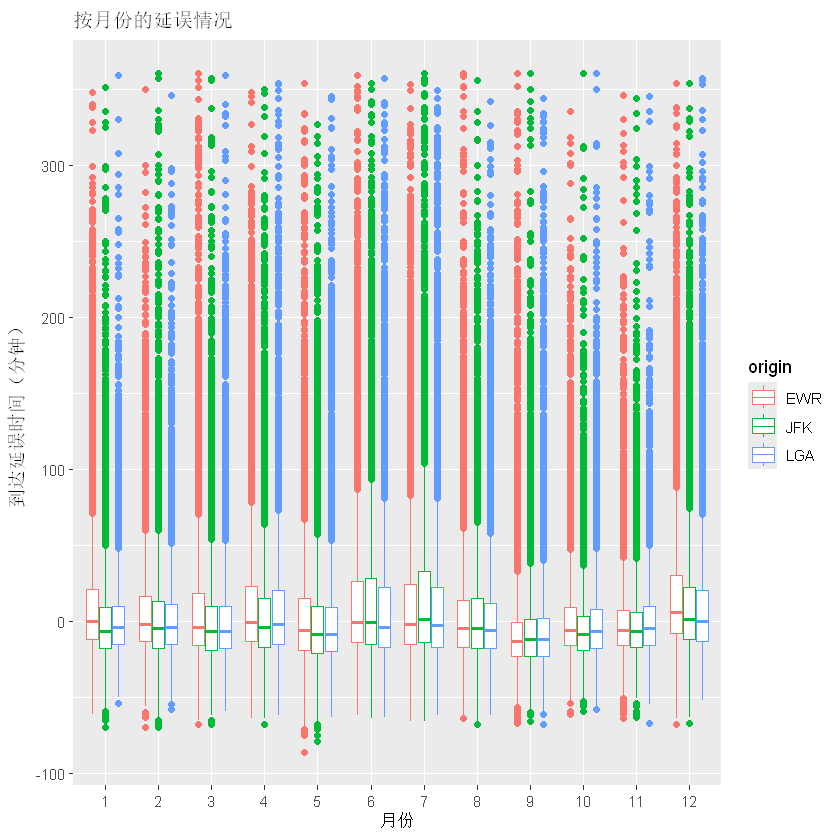

In [ ]:
library(ggplot2)
flights %>%
    filter(arr_delay <= 360) %>%
    ggplot(aes(x = factor(month), y = arr_delay, color = origin)) +
    geom_boxplot() +
    ggtitle("按月份的延误情况") +
    xlab("月份") +
    ylab("到达延误时间（分钟）")

ggplot代码详解

**1. 初始化绘图对象：`ggplot(aes(x = factor(month), y = arr_delay, color = origin))`**

- `ggplot()`: 创建一个 ggplot 对象，用于绘图。

- `aes()`

  : 定义图形映射（aesthetics），即图表中的变量和属性的关系：

  - **`x = factor(month)`**: 将 `month` 变量映射到 X 轴，并将其转换为因子（`factor`），以确保月份以分类变量的形式呈现。
  - **`y = arr_delay`**: 将 `arr_delay` 变量映射到 Y 轴，表示到达延误时间。
  - **`color = origin`**: 使用 `origin`（航班出发地）区分数据点的颜色。

**2. 添加几何对象：`geom_boxplot()`**

- `geom_boxplot()`

  : 绘制箱线图，用于显示每个月到达延误时间的分布情况。

  - 每个箱线图表示一个月份的延误数据分布。
  - 通过箱线图可以看到数据的中位数、四分位数范围以及潜在的异常值。

**3. 添加标题和轴标签**

- **`ggtitle("按月份的延误情况")`**: 设置图表的主标题。
- **`xlab("月份")`**: 设置 X 轴标签为“月份”。
- **`ylab("到达延误时间（分钟）")`**: 设置 Y 轴标签为“到达延误时间（分钟）”。

### 例子②

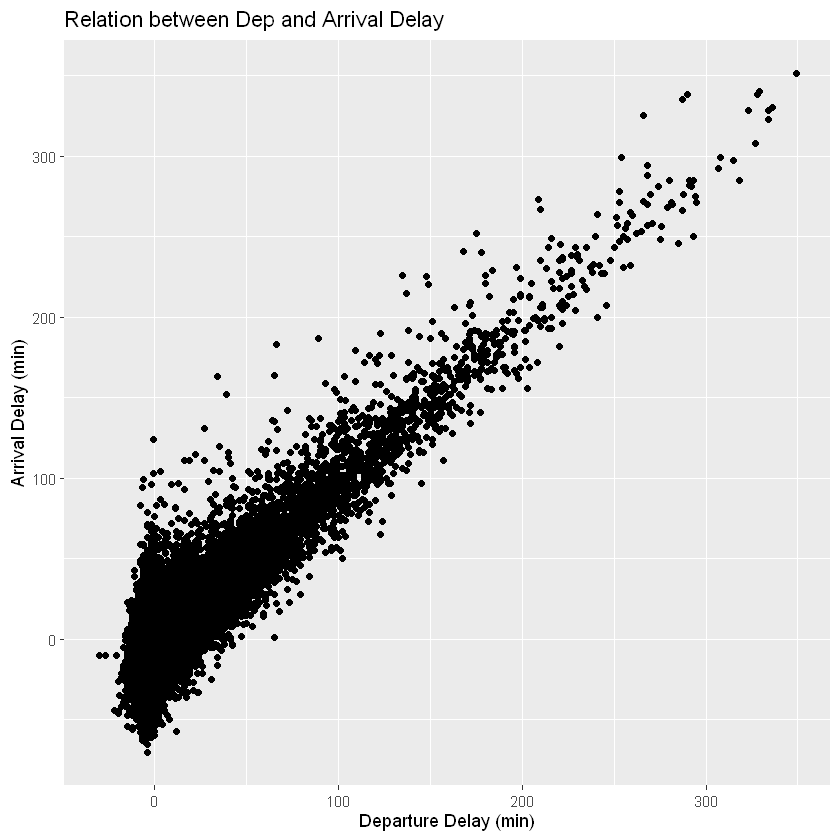

In [19]:
flights %>%
    filter(month == 1, arr_delay < 360, dep_delay < 360) %>%
    ggplot(aes(x = dep_delay, y = arr_delay)) +
    geom_point() +
    ggtitle("Relation between Dep and Arrival Delay") +
    xlab("Departure Delay (min)") +
    ylab("Arrival Delay (min)")